# U.S. Medical Insurance Costs

In [71]:
import csv
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

csv_file = 'insurance.csv'
pd.set_option('display.float_format','{:.2f}'.format)

insurance_info = pd.read_csv(csv_file)
insurance_info.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


<AxesSubplot: xlabel='age', ylabel='charges'>

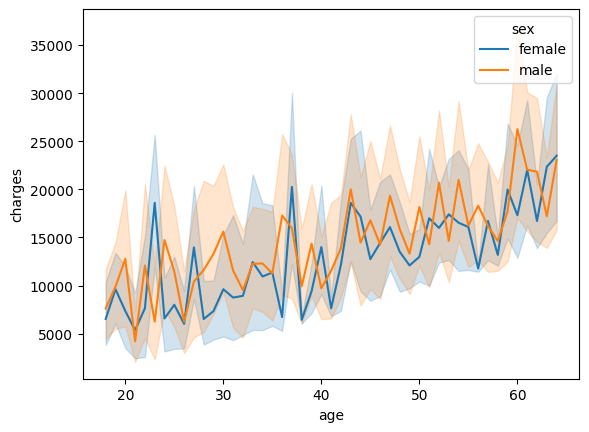

In [97]:
sb.lineplot(insurance_info, x='age', y='charges', hue='sex')

<AxesSubplot: xlabel='age', ylabel='charges'>

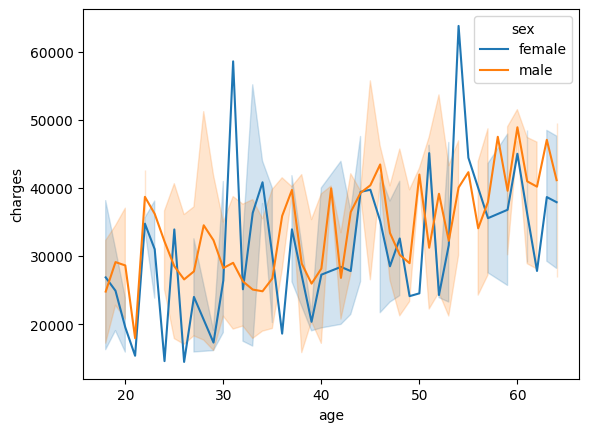

In [100]:
insurance_info_smoker = insurance_info.query("smoker == 'yes'")
sb.lineplot(insurance_info_smoker, x='age', y='charges', hue='sex')

<AxesSubplot: xlabel='age', ylabel='charges'>

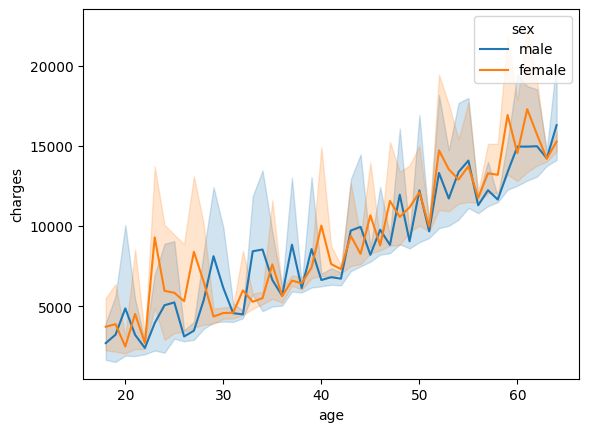

In [102]:
insurance_info_nonsmoker = insurance_info.query("smoker =='no'")
sb.lineplot(insurance_info_nonsmoker, x='age', y='charges', hue='sex')

<AxesSubplot: xlabel='age', ylabel='charges'>

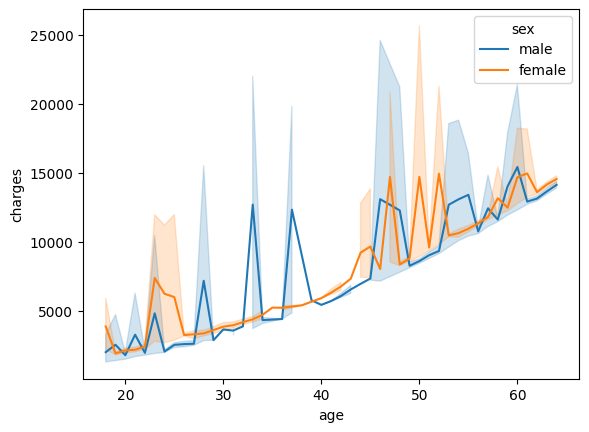

In [107]:
insurance_info_nonsmoker = insurance_info.loc[(insurance_info['smoker'] == 'no') & (insurance_info['children'] == 0)]
sb.lineplot(insurance_info_nonsmoker, x='age', y='charges', hue='sex')

In [47]:
female_male_counts = insurance_info.value_counts('sex')

print(female_male_counts)

sex
male      676
female    662
dtype: int64


In [48]:
mean_bmi_by_sex = insurance_info.groupby('sex')['bmi'].mean()
print(mean_bmi_by_sex)

sex
female   30.38
male     30.94
Name: bmi, dtype: float64


In [49]:
smoker_status_by_sex = insurance_info.groupby('sex')['smoker'].value_counts()
smoker_status = insurance_info['smoker'].value_counts()

print(smoker_status_by_sex)
print(smoker_status)

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


In [50]:
mean_charges_by_sex = insurance_info.groupby('sex')['charges'].mean()
mean_charges = insurance_info['charges'].mean()
max_charge = insurance_info['charges'].max()
min_charge = insurance_info['charges'].min()

print(mean_charges_by_sex)
print("{:.2f}".format(mean_charges))
print("{:.2f}".format(max_charge))
print("{:.2f}".format(min_charge))

sex
female   12569.58
male     13956.75
Name: charges, dtype: float64
13270.42
63770.43
1121.87


In [51]:
mean_charges_smoker = insurance_info.groupby('smoker')['charges'].mean()
max_charges_smoker = insurance_info.groupby('smoker')['charges'].max()
min_charges_smoker = insurance_info.groupby('smoker')['charges'].min()

print(mean_charges_smoker)
print(max_charges_smoker)
print(min_charges_smoker)

smoker
no     8434.27
yes   32050.23
Name: charges, dtype: float64
smoker
no    36910.61
yes   63770.43
Name: charges, dtype: float64
smoker
no     1121.87
yes   12829.46
Name: charges, dtype: float64


In [52]:
mean_children = insurance_info['children'].mean()
max_children = insurance_info['children'].max()
min_children = insurance_info['children'].min()

print("{:.2f}".format(mean_children))
print(max_children)
print(min_children)

1.09
5
0


In [53]:
mean_children_by_sex = insurance_info.groupby('sex')['children'].mean()
print(mean_children_by_sex)

sex
female   1.07
male     1.12
Name: children, dtype: float64


In [66]:
mean_charges_by_region_sex = insurance_info.groupby(['region','sex'])['charges'].mean().reset_index()
print(mean_charges_by_region_sex)

      region     sex  charges
0  northeast  female 12953.20
1  northeast    male 13854.01
2  northwest  female 12479.87
3  northwest    male 12354.12
4  southeast  female 13499.67
5  southeast    male 15879.62
6  southwest  female 11274.41
7  southwest    male 13412.88


In [63]:
nw_charges = mean_charges_by_region_sex[['region', 'sex', 'charges']]
print(nw_charges)

      region     sex  charges
0  northeast  female 12953.20
1  northeast    male 13854.01
2  northwest  female 12479.87
3  northwest    male 12354.12
4  southeast  female 13499.67
5  southeast    male 15879.62
6  southwest  female 11274.41
7  southwest    male 13412.88


<AxesSubplot: xlabel='region', ylabel='charges'>

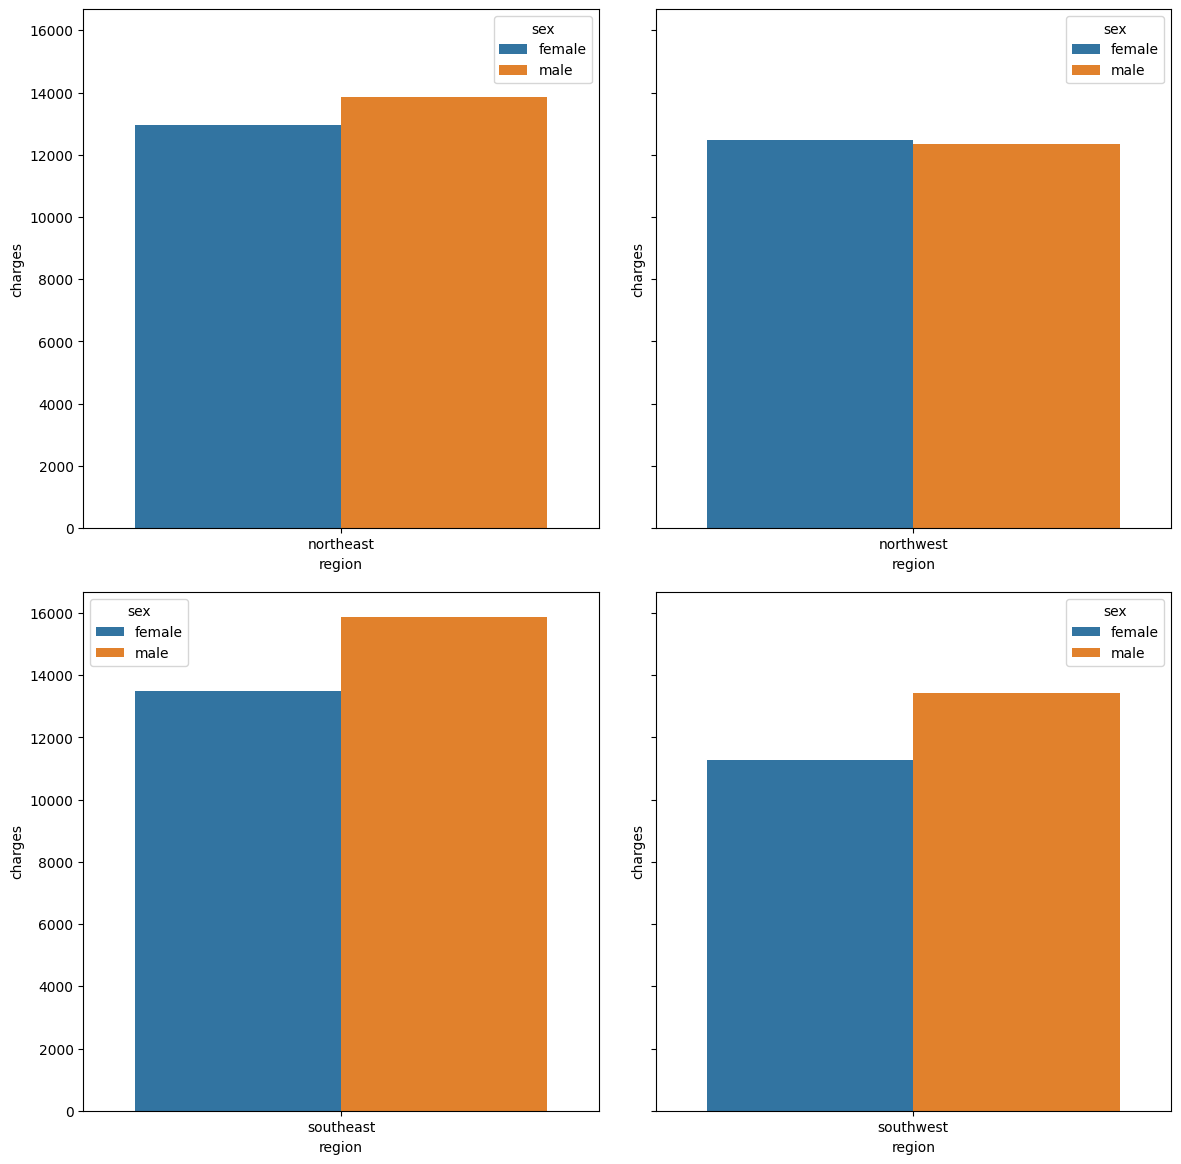

In [96]:
fig, ax = plt.subplots(2,2, sharey=True, figsize=(12,12))
fig.tight_layout(pad=2.5)
sb.barplot(nw_charges.loc[0:1], x='region', y='charges', hue='sex', ax=ax[0,0])
sb.barplot(nw_charges.loc[2:3], x='region', y='charges', hue='sex', ax=ax[0,1])
sb.barplot(nw_charges.loc[4:5], x='region', y='charges', hue='sex', ax=ax[1,0])
sb.barplot(nw_charges.loc[6:7], x='region', y='charges', hue='sex', ax=ax[1,1])